## Librerias

In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

import sys
sys.path.append('C:\\Users\\camil\\OneDrive\\Documentos\\GitHub\\GITHUb\\EDA_DS\\Src\\utils')
import gold_statistics
import null_values
import cardinalidad

## Carga de datos

In [2]:
df = pd.read_csv("C:\\Users\\camil\\OneDrive\\Documentos\\GitHub\\GITHUb\\EDA_DS\\Src\\Data\\process\\s10_teamstats.csv", index_col=False, parse_dates=["date"])

## Exploración del dataset tratado

In [3]:
df

,gameId,league,split,playoffs,date,game,patch,gamelength,blue_playerid,result,firstblood,firstdragon,blue_dragons,blue_elementaldrakes,blue_infernals,blue_mountains,blue_clouds,blue_oceans,blue_elders,firstherald,blue_heralds,firstbaron,blue_barons,firsttower,blue_towers,firstmidtower,firsttothreetowers,blue_inhibitors,red_playerid,red_dragons,red_elementaldrakes,red_infernals,red_mountains,red_clouds,red_oceans,red_elders,red_heralds,red_barons,red_towers,red_inhibitors,blue_totalgold,blue_earnedgold,blue_spentgold,blue_goldat10,blue_goldat15,red_totalgold,red_earnedgold,red_spentgold,red_goldat10,red_goldat15,blue_totalgold_diff,red_totalgold_diff,blue_earnedgold_diff,red_earnedgold_diff,blue_spentgold_diff,red_spentgold_diff,blue_gold_diffat10,red_gold_diffat10,blue_gold_diffat15,red_gold_diffat15
0,1241318,KeSPA,NaN,0,2020-01-03 07:33:00,1,9.24,2220,SANDBOX Gaming,1,0.0,0.0,2,2.0,0.0,2.0,0.0,0.0,0.0,1.0,1.0,1.0,1,0.0,8,0.0,0.0,1.0,T1,3,3.0,1.0,1.0,1.0,0.0,0.0,1.0,0,4,0.0,68927,44907,62275.0,14615.0,21953.0,62709,38689,62025.0,14498.0,22778.0,6218,-6218,6218,-6218,250.0,-250.0,117.0,-117.0,-825.0,825.0
1,1241322,KeSPA,NaN,0,2020-01-03 09:00:00,2,9.24,2227,T1,0,0.0,0.0,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0.0,2,1.0,0.0,0.0,SANDBOX Gaming,4,4.0,0.0,1.0,1.0,2.0,0.0,2.0,2,9,1.0,57283,33188,56575.0,14180.0,21714.0,72004,47909,63975.0,16194.0,27198.0,-14721,14721,-14721,14721,-7400.0,7400.0,-2014.0,2014.0,-5484.0,5484.0
2,1241324,KeSPA,NaN,0,2020-01-03 10:05:00,3,9.24,1711,T1,1,0.0,1.0,4,4.0,0.0,2.0,1.0,1.0,0.0,1.0,2.0,1.0,1,1.0,10,1.0,1.0,2.0,SANDBOX Gaming,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0.0,58078,39248,50660.0,15531.0,24882.0,42465,23635,40375.0,14849.0,22316.0,15613,-15613,15613,-15613,10285.0,-10285.0,682.0,-682.0,2566.0,-2566.0
3,1241328,KeSPA,NaN,0,2020-01-03 10:57:00,4,9.24,1999,T1,0,0.0,1.0,2,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0,0.0,3,0.0,0.0,0.0,SANDBOX Gaming,3,3.0,0.0,0.0,3.0,0.0,0.0,1.0,2,9,1.0,50749,28979,48400.0,14313.0,22329.0,64845,43075,57400.0,15892.0,24800.0,-14096,14096,-14096,14096,-9000.0,9000.0,-1579.0,1579.0,-2471.0,2471.0
4,1241386,KeSPA,NaN,0,2020-01-04 05:33:00,1,9.24,1812,DRX,0,0.0,0.0,1,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0,1.0,4,0.0,0.0,0.0,Afreeca Freecs,4,4.0,0.0,1.0,1.0,2.0,0.0,0.0,2,8,1.0,48633,28773,47010.0,15388.0,24644.0,58837,38977,51785.0,16135.0,23767.0,-10204,10204,-10204,10204,-4775.0,4775.0,-747.0,747.0,877.0,-877.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5144,1310259,EM,NaN,0,2020-08-18 20:25:00,1,10.16,2075,Racoon,1,0.0,1.0,4,4.0,2.0,1.0,0.0,1.0,0.0,1.0,2.0,1.0,1,1.0,11,1.0,1.0,5.0,SAMCLAN Esports Club,1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1,3,0.0,64974,42429,57925.0,15437.0,25367.0,56098,33553,57108.0,15263.0,22918.0,8876,-8876,8876,-8876,817.0,-817.0,174.0,-174.0,2449.0,-2449.0
5145,1310260,EM,NaN,0,2020-08-18 20:27:00,1,10.16,2095,SINNERS Esports,1,0.0,0.0,2,2.0,0.0,0.0,0.0,2.0,0.0,1.0,2.0,1.0,3,1.0,11,1.0,1.0,4.0,Five Kings,4,4.0,1.0,1.0,0.0,2.0,0.0,0.0,0,1,0.0,70858,48113,65058.0,18545.0,28688.0,58726,35981,54775.0,16559.0,24468.0,12132,-12132,12132,-12132,10283.0,-10283.0,1986.0,-1986.0,4220.0,-4220.0
5146,1310262,EM,NaN,0,2020-08-18 20:53:00,1,10.16,2879,Team GamerLegion,1,1.0,0.0,4,4.0,0.0,3.0,0.0,1.0,0.0,1.0,2.0,0.0,2,1.0,10,1.0,1.0,2.0,Riddle Esports,3,3.0,1.0,2.0,0.0,0.0,0.0,0.0,1,7,1.0,87236,56491,84670.0,14766.0,23862.0,82842,52097,79411.0,14861.0,23284.0,4394,-4394,4394,-4394,5259.0,-5259.0,-95.0,95.0,578.0,-578.0
5147,1320317,EM,NaN,0,2020-08-18 20:56:00,1,10.16,1874,G2 Arctic,1,0.0,0.0,2,2.0,1.0,1.0,0.0,0.0,0.0,1.0,2.0,1.0,2,1.0,10,1.0,1.0,1.0,CR4ZY,2,2.0,0.0,1.0,1.0,0.0,0.0,0.0,0,0,0.0,57694,37199,52925.0,16975.0,26145.0,45986,25491,45250.0,16091.0,24157.0,11708,-11708,11708,-11708,7675.0,-7675.0,884.0,-884.0,1988.0,-1988.0


In [4]:
df.shape

(5149, 60)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5149 entries, 0 to 5148
Data columns (total 60 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   gameId                5148 non-null   object        
 1   league                5149 non-null   object        
 2   split                 3566 non-null   object        
 3   playoffs              5149 non-null   int64         
 4   date                  5149 non-null   datetime64[ns]
 5   game                  5149 non-null   int64         
 6   patch                 5149 non-null   float64       
 7   gamelength            5149 non-null   int64         
 8   blue_playerid         5149 non-null   object        
 9   result                5149 non-null   int64         
 10  firstblood            5148 non-null   float64       
 11  firstdragon           5095 non-null   float64       
 12  blue_dragons          5149 non-null   int64         
 13  blue_elementaldrak

In [6]:
df.describe(exclude=object).shape

(8, 55)

In [7]:
df.describe(include=object).shape

(4, 5)

Hemos reducido bastante el número de variables, quedandonos con las más relevantes o al menos las más útiles para el análisis que queremos hacer. Se siguen manteniendo los nulos pero ahora serán más fácilmente imputables. 

## Tratamiento de nulos

In [24]:
for i in df:
    a = df[i].isna().sum()
    if a > 0:
        print(f"La cantidad de nulos de la variable {i} es {a}")

Eliminando las dos columnas con nulos que no son relevates para el análisis

In [9]:
del df["gameId"]

In [10]:
del df["split"]

Para el resto, haremos haremos drop de los nulos al no ser un porcentaje muy representativo

In [25]:
df = df.dropna()

## Cardinalidad

In [13]:
cdn = cardinalidad.cardinalidad(df)

In [19]:
cdn  = cdn.reset_index()

Falta añadir el tipo de dato

In [78]:
tipo_dato = ["Categórico", "Binario", "Date", "Ordinal", "Ordinal", "Temporal", "Categótico", "Binario", "Binario", "Binario",
             "Numérico", "Numérico", "Numérico", "Numérico", "Numérico", "Numérico", "Numérico", "Binario", "Numérico", "Binario",
             "Binario", "Binario", "Binario", "Numérico", "Binario", "Numérico", "Categórico", "Numérico", "Numérico", "Numérico",
             "Numérico", "Numérico", "Numérico", "Numérico", "Numérico", "Numérico", "Numérico", "Numérico", "Numérico", "Numérico",
             "Numérico", "Numérico", "Numérico", "Numérico", "Numérico", "Numérico", "Numérico", "Numérico", "Numérico", "Numérico",
             "Numérico", "Numérico", "Numérico", "Numérico", "Numérico", "Numérico", "Numérico", "Numérico"]

cdn["Tipo_dato"] = tipo_dato

In [79]:
cdn

,Columna,Total de únicos,Cardinalidad,Cardinalidad (%),Tipo_dato
0,league,23,0.004735,0.473543,Categórico
1,playoffs,2,0.000412,0.041178,Binario
2,date,4745,0.976940,97.694050,Date
3,game,5,0.001029,0.102944,Ordinal
4,patch,16,0.003294,0.329421,Ordinal
5,gamelength,1355,0.278979,27.897879,Temporal
6,blue_playerid,244,0.050237,5.023677,Categótico
7,result,2,0.000412,0.041178,Binario
8,firstblood,2,0.000412,0.041178,Binario
9,firstdragon,2,0.000412,0.041178,Binario


Ajustamos el tipo de dato a tipo de variable

In [83]:
binarios = cdn["Columna"][cdn["Tipo_dato"] == "Binario"]

In [85]:
df[binarios] = df[binarios].astype(bool)

In [88]:
categoricos = cdn["Columna"][cdn["Tipo_dato"] == "Categórico"]

df[categoricos] = df[categoricos].astype(object)

In [91]:
oddinales = cdn["Columna"][cdn["Tipo_dato"] == "Ordinal"]

df[oddinales] = df[oddinales].astype(object)

In [92]:
df.dtypes

league                          object
playoffs                          bool
date                    datetime64[ns]
game                            object
patch                           object
gamelength                       int64
blue_playerid                   object
result                            bool
firstblood                        bool
firstdragon                       bool
blue_dragons                     int64
blue_elementaldrakes           float64
blue_infernals                 float64
blue_mountains                 float64
blue_clouds                    float64
blue_oceans                    float64
blue_elders                    float64
firstherald                       bool
blue_heralds                   float64
firstbaron                        bool
blue_barons                       bool
firsttower                        bool
blue_towers                       bool
firstmidtower                  float64
firsttothreetowers                bool
blue_inhibitors          

Por último, procedemos a realizar un mapa de correlaciones para observar como se relacionan las variables y hacernos tener una idea general de como se estructuran, además de guardar el dataframe en un csv ya que este será el que analicemos.

In [97]:
df.to_csv("C:\\Users\\camil\\OneDrive\\Documentos\\GitHub\\GITHUb\\EDA_DS\\Src\\Data\\final\\s10_final.csv")

Text(0.5, 1.0, 'Correlation heatmap of the variables')

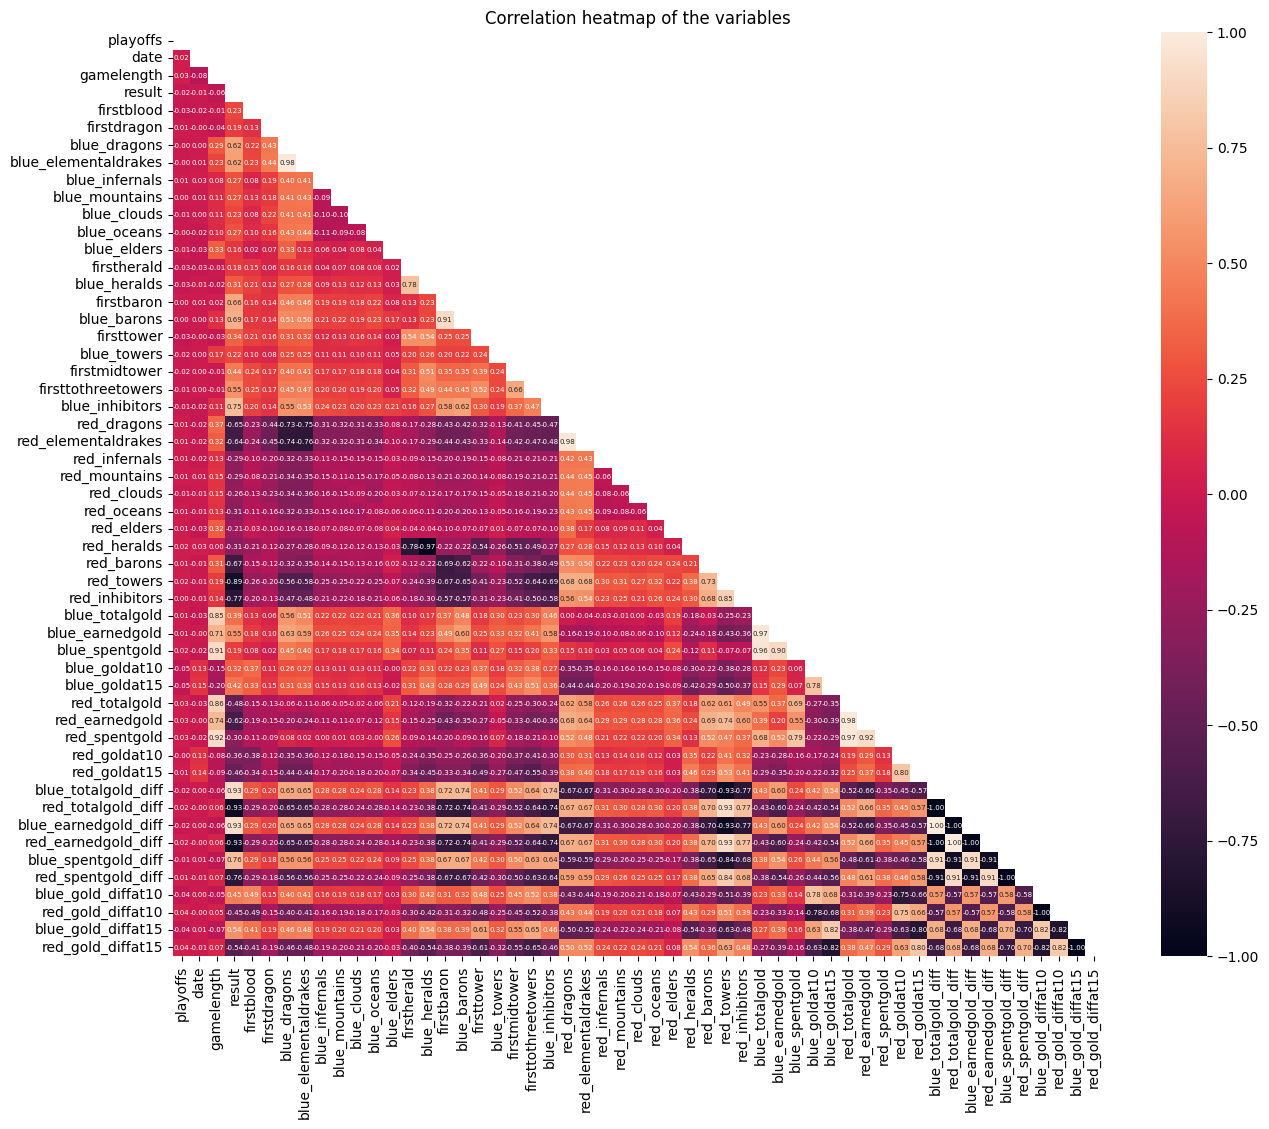

In [96]:
plt.figure(figsize=(15,12))
mask = np.triu(np.ones_like(df.select_dtypes(exclude="object").corr()))
ax = sns.heatmap(df.select_dtypes(exclude="object").corr(), mask=mask, annot=True, annot_kws={"fontsize":5}, fmt="0.2f")
plt.title("Correlation heatmap of the variables")